# Race

A related topic to immigration is Race. We can use table [B02001: Race](
https://censusreporter.org/data/table/?table=B02001&geo_ids=97000US3612510&primary_geo_id=97000US3612510) to see how the racial composition of Great Neck has changed over the course of the 5-year ACS (2009-2019).

In [18]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear, graph_multiyear, pct_change_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2014, 2019],
    group="B02001",
    prompt=False,
    state=NY,
    school_district_unified="12510",
)
df

...

,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",Year
0,44953,37848,783,6,5132,0,1029,155,51,104,2009
0,45249,34424,1304,161,7176,4,1078,1102,211,891,2014
0,45044,31742,887,159,10304,0,1203,749,18,731,2019


So there are two primary racial groups within Great Neck: "White alone" and "Asian alone". Let's simplify things by dropping all the other columns, and then creating two graphs: the raw data, and the percent change in those values over time.

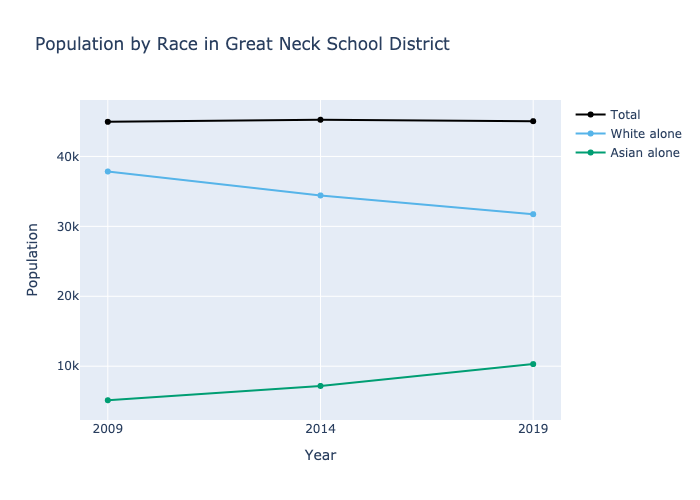

In [22]:
cols_to_keep = ["Total", "White alone", "Asian alone", "Year"]
df = df.drop(columns=[col for col in df.columns if col not in cols_to_keep]) 

graph_multiyear(
    df=df,
    title="Population by Race in Great Neck School District",
    yaxis_title="Population"
)

   Total  White alone  Asian alone  Year
0    NaN          NaN          NaN  2009
0    0.7         -9.0         39.8  2014
0   -0.5         -7.8         43.6  2019


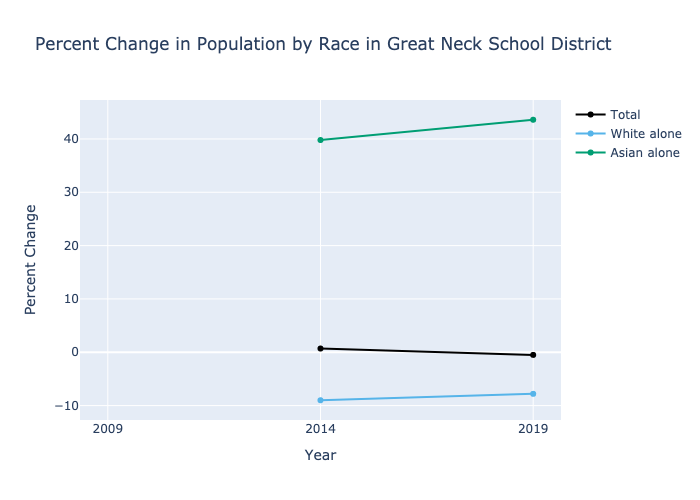

In [23]:
df_percent_change = pct_change_multiyear(df)
print(df_percent_change)

graph_multiyear(
    df=df_percent_change,
    title="Percent Change in Population by Race in Great Neck School District",
    yaxis_title="Percent Change",
    y_cols=["Total", "White alone", "Asian alone"]    
)

It is remarkable just how rapidly the population of "Asian alone" is increasing in Great Neck: 40+% in each of the last 5-year periods! It might also be helpful to visualize the percentage of the total population in each group.

In [24]:
df['Percent White alone'] = (df['White alone'] / df['Total'] * 100).round()
df['Percent Asian alone'] = (df['Asian alone'] / df['Total'] * 100).round()

print(df)

   Total  White alone  Asian alone  Year  Percent White alone  \
0  44953        37848         5132  2009                 84.0   
0  45249        34424         7176  2014                 76.0   
0  45044        31742        10304  2019                 70.0   

   Percent Asian alone  
0                 11.0  
0                 16.0  
0                 23.0  


   Total  White alone  Asian alone  Year  Percent White alone  \
0  44953        37848         5132  2009                 84.0   
0  45249        34424         7176  2014                 76.0   
0  45044        31742        10304  2019                 70.0   

   Percent Asian alone  
0                 11.0  
0                 16.0  
0                 23.0  


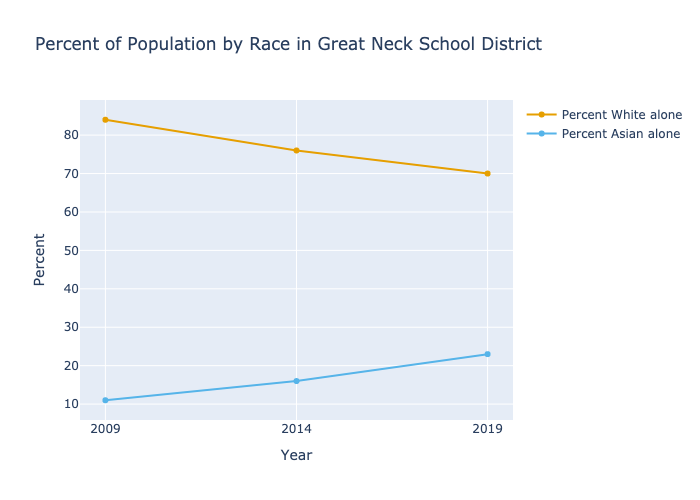

In [25]:
df['Percent White alone'] = (df['White alone'] / df['Total'] * 100).round()
df['Percent Asian alone'] = (df['Asian alone'] / df['Total'] * 100).round()

print(df)

graph_multiyear(
    df=df,
    title="Percent of Population by Race in Great Neck School District",
    yaxis_title="Percent",
    y_cols=["Percent White alone", "Percent Asian alone"]
)

So the percentage of "Asian alone" residents in Great Neck doubled over 10 years, from 11% to 23% of the total population. I did not expect that, as that transformation happened long after I moved out. 